# Example 3.2: Train a softmax layer

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

## Set the parameters of the layer and for learning

In [2]:
num_epochs = 3000
num_inputs = 2
num_classes = 3
lr = 0.05

SEED = 10
np.random.seed(SEED)

## Prepare inputs and outputs

In [3]:
# data
X = np.array([[0.94, 0.18],[-0.58, -0.53],[-0.23, -0.31],[0.42, -0.44],
              [0.5, -1.66],[-1.0, -0.51],[0.78, -0.65],[0.04, -0.20]])
Y = np.array([0, 1, 1, 0, 2, 1, 0, 2])
K = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 1, 0],
              [1, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [1, 0, 0],
              [0, 0, 1]]).astype(float)

print(X)
print(Y)
print(lr)

[[ 0.94  0.18]
 [-0.58 -0.53]
 [-0.23 -0.31]
 [ 0.42 -0.44]
 [ 0.5  -1.66]
 [-1.   -0.51]
 [ 0.78 -0.65]
 [ 0.04 -0.2 ]]
[0 1 1 0 2 1 0 2]
0.05


## Define the class for the softmax layer

In [4]:
class Softmax_Layer():
  def __init__(self, no_features, no_labels):
    self.w = torch.tensor(np.random.rand(no_features, no_labels), dtype=torch.double)
    self.b = torch.zeros([no_labels], dtype=torch.double)

  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    p = torch.exp(u)/torch.sum(torch.exp(u), dim=1, keepdims=True)
    y = torch.argmax(p, dim=1)
    return u, p, y

In [5]:
def loss_fn(p, k, y):
    entropy = -torch.sum(torch.log(p)*k)
    error = torch.sum(torch.not_equal(torch.argmax(k, dim=1), y))
    return entropy, error

In [6]:
def train(model, inputs, k, learning_rate):
    _, p, y = model(inputs)
    grad_u = -(k - p)
    grad_w = torch.matmul(torch.transpose(torch.tensor(inputs), 0, 1), grad_u)
    grad_b = torch.sum(grad_u, dim = 0) 
    
    model.w -= learning_rate * grad_w
    model.b -= learning_rate * grad_b
    
    return grad_u, grad_w, grad_b

## Initialize the layer

In [7]:
model = Softmax_Layer(num_inputs, num_classes)

print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[0.77132064 0.02075195 0.63364823]
 [0.74880388 0.49850701 0.22479665]], b: [0. 0. 0.]


## Train the layer

In [8]:
loss_, err_ = [], []
for epoch in range(num_epochs):
    u_, p_, y_ = model(X)
    l_, e_ = loss_fn(p_, torch.tensor(K), y_)
    grad_u_, grad_w_, grad_b_ = train(model, X, torch.tensor(K), lr)
    
    if (epoch == 0):
        print('epoch: {}'.format(epoch+1))
        print('u: {}'.format(u_.numpy()))
        print('p: {}'.format(p_.numpy()))
        print('y: {}'.format(y_.numpy()))
        print('entropy: {}'.format(l_.numpy()))
        print('error: {}'.format(e_.numpy()))
        print('grad_u: {}'.format(grad_u_.numpy()))
        print('grad_w: {}'.format(grad_w_.numpy()))
        print('grad_b: {}'.format(grad_b_.numpy()))

        print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
  
    loss_.append(l_.numpy()), err_.append(e_.numpy())

    if epoch%100 == 99:
        print('epoch:{}, loss:{}, error:{}'.format(epoch+1,loss_[epoch], err_[epoch]))

epoch: 1
u: [[ 0.8598261   0.10923809  0.63609274]
 [-0.84423203 -0.27624485 -0.4866582 ]
 [-0.40953295 -0.15931012 -0.21542605]
 [-0.00551904 -0.21062727  0.16722173]
 [-0.85735412 -0.81714567 -0.05633831]
 [-1.15321062 -0.27499053 -0.74829452]
 [ 0.11490758 -0.30784304  0.3481278 ]
 [-0.11890795 -0.09887132 -0.0196134 ]]
p: [[0.44021502 0.20782062 0.35196436]
 [0.2384036  0.42071356 0.34088285]
 [0.28583371 0.36709954 0.34706675]
 [0.33298735 0.27123789 0.39577476]
 [0.23425619 0.2438672  0.52187661]
 [0.20384081 0.4905658  0.30559339]
 [0.34271204 0.22455933 0.43272862]
 [0.32003787 0.32651502 0.35344712]]
y: [0 1 1 2 2 1 2 2]
entropy: 7.261474150047841
error: 2
grad_u: [[-0.55978498  0.20782062  0.35196436]
 [ 0.2384036  -0.57928644  0.34088285]
 [ 0.28583371 -0.63290046  0.34706675]
 [-0.66701265  0.27123789  0.39577476]
 [ 0.23425619  0.2438672  -0.47812339]
 [ 0.20384081 -0.5094342   0.30559339]
 [-0.65728796  0.22455933  0.43272862]
 [ 0.32003787  0.32651502 -0.64655288]]
grad_

In [9]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('loss:{}'.format(loss_[-1]))

w: [[ 14.2269231  -13.03844364   0.23724137]
 [  4.47096911  -2.05083283  -0.94802875]], b: [-0.52873635 -0.47207383  1.00081018]
loss:0.5627734713585199


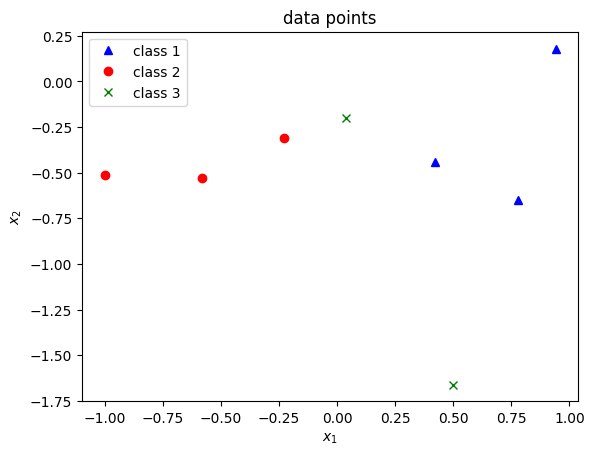

In [10]:
plt.figure(1)
plot_pred = plt.plot(X[Y==0,0], X[Y==0,1], 'b^', label='class 1')
plot_original = plt.plot(X[Y==1,0], X[Y==1,1], 'ro', label='class 2')
plot_original = plt.plot(X[Y==2,0], X[Y==2,1], 'gx', label='class 3')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('data points')
plt.legend()

Text(0, 0.5, 'cross-entropy')

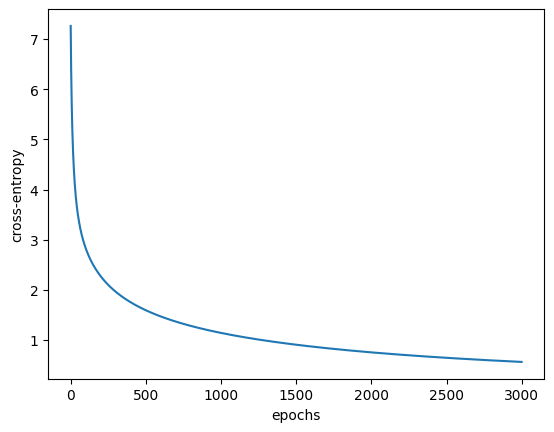

In [11]:
plt.figure(2)
plt.plot(range(num_epochs), loss_)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')

Text(0, 0.5, 'classification error')

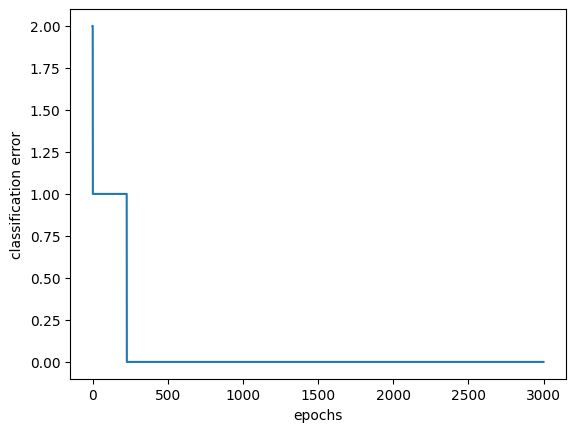

In [12]:
plt.figure(3)
plt.plot(range(num_epochs), err_)
plt.xlabel('epochs')
plt.ylabel('classification error')